# KDE - Estimador por Densidade de Kernel

Caso as amostras atendam um critério de normalidade (uma gaussiana gera os dados), a distribuição pode ser estimada pela média, desvio padrão etc.

Caso contrário, utilizamos modelos não paramétricos como misturas de gaussianas ou KDE.

O KDE sobrepõe gaussianas centradas em cada uma das amostras do conjunto de dados.

Uma vez que o KDE não faz suposição sobre a estrutura dos dados, ele pode ser utilizado numa ampla gama de problemas, e é especialmente útil quando não se conhece a distribuição dos dados.

*Desvantagens*:
- **Computacionalmente caro**
- **Sensibilidade à largura de Kernel**
- **Viés de borda**: o KDE tende a suavizar as bordas dos dados.
- **Interpretação Subjetiva**

Para definir o h, pode utilizar a Regra de Silverman: $h = 1.06 \hat{\sigma} N^{-\frac{1}{5}}$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from utils import make_normal_data, pdfnormal
np.random.seed(123)
plt.style.use('seaborn-v0_8')

## Criando dados univariados

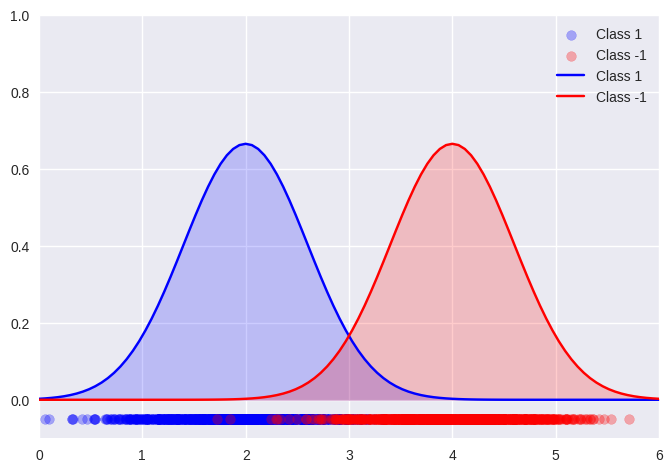

In [2]:
s = 0.6
N = 1000
c1 = [2]
c2 = [4]

x1, y1 = make_normal_data(s = s, n = N, c = np.array(c1), dim = 1, label = 1)
x2, y2 = make_normal_data(s = s, n = N, c = np.array(c2), dim = 1, label = -1)

grid = np.linspace(0, 6, 100)
normal1 = pdfnormal(grid, 2, s)
normal2 = pdfnormal(grid, 4, s)

plt.scatter(x1, np.zeros(len(x1)) - 0.05, c = 'blue', label = 'Class 1', alpha= 0.3)
plt.scatter(x2, np.zeros(len(x2)) - 0.05, c = 'red', label = 'Class -1', alpha= 0.3)
plt.plot(grid, normal1, label = 'Class 1', color = 'blue')
plt.plot(grid, normal2, label = 'Class -1', color = 'red')
plt.fill_between(grid, normal1, color='blue', alpha=0.2)
plt.fill_between(grid, normal2, color='red', alpha=0.2)
plt.xlim(0, 6)
plt.ylim(-0.1, 1)
plt.legend()

## Implementação do KDE

In [3]:
def kernel(u):
    return (1 / (np.sqrt(2 * np.pi))) * np.exp(-(u ** 2) / 2)

def kde(data, h):
    dim = len(data)
    x = np.linspace(0, 6, 100)
    kde = np.zeros_like(x)
    
    for j in range(len(x)):
        for i in range(dim):
            kde[j] += kernel((x[j] - data[i]) / h)
        kde[j] /= dim*h
    
    return kde

## Previsão do KDE para vários valores de h 

Regra de Silverman: h = 0.16


/tmp/ipykernel_7961/398965674.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  kde[j] += kernel((x[j] - data[i]) / h)


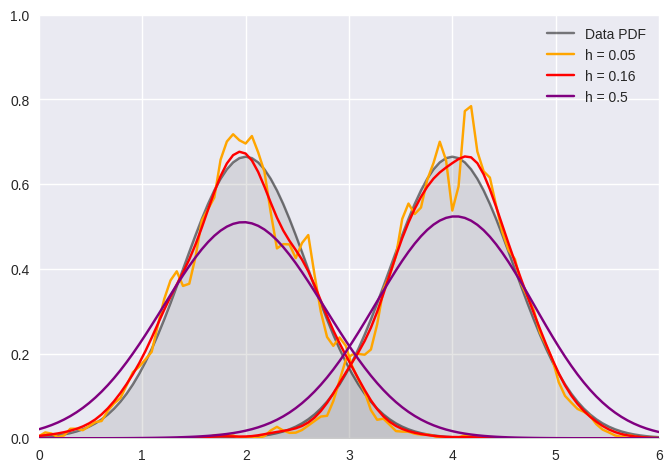

In [4]:
silverman = 1.06 * s * N **(-1/5)
print(f'Regra de Silverman: h = {silverman:.2f}')

h_list = [0.05, 0.16 , 0.5]
colors = ['orange', 'red', 'purple']

plt.plot(grid, normal1, color = 'black', alpha = 0.5, label = 'Data PDF')
plt.plot(grid, normal2, color = 'black', alpha = 0.5)
plt.fill_between(grid, normal1, color='gray', alpha=0.2)
plt.fill_between(grid, normal2, color='gray', alpha=0.2)
plt.xlim(0, 6)
plt.ylim(0, 1)

for h, color in zip(h_list, colors):
    kde1 = kde(x1, h)
    kde2 = kde(x2, h)
    
    plt.plot(grid, kde1, label = f'h = {h}', color = color)
    plt.plot(grid, kde2, color = color)

plt.legend()